In [1]:
import tensorflow as tf

In [2]:
# linear layer

def add_layer(inputs, input_size, output_size, n_layer=1,activation_function=None):
    layer_name = "layer_{}".format(n_layer)
    with tf.name_scope(layer_name):
        with tf.name_scope("weights"):
            Weights = tf.Variable(tf.random_normal([input_size, output_size]), name="W")
            tf.histogram_summary(layer_name+'/weights', Weights) # add histogram summary.
            bias = tf.Variable(tf.zeros([1, output_size])+0.1)
        W_plus_b = tf.matmul(inputs, Weights) + bias
        if activation_function is None :
            outputs = W_plus_b
        else :
            outputs = activation_function(W_plus_b)
        return outputs

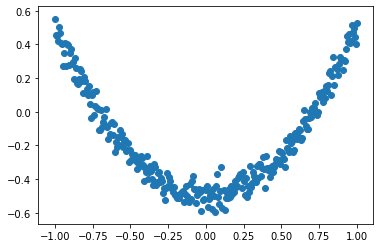

In [4]:
import numpy as np 
from matplotlib import pyplot as plt 

x_data = np.linspace(-1, 1, 300)[:, np.newaxis] # 300 * 1 
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data) - 0.5 + noise # additive model 

# visualize training data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.show()

# add label to layer diagram (two ways)
with tf.name_scope("Inpput"):
    x = tf.placeholder(tf.float32, [None, 1], name="x_input")
    y = tf.placeholder(tf.float32, [None, 1], name="y_input")

l1 = add_layer(x, 1, 10, 1, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, 2, activation_function=None)

with tf.name_scope("Loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(y - prediction), reduction_indices = [1]))
    tf.scalar_summary('loss', loss) # add scalar summary

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
merged = tf.merge_all_summaries()  # set a node 
writer = tf.summary.FileWriter("./logs", sess.graph)
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={x:x_data, y:y_data})
    if i%50 == 0 :
        # print(sess.run(loss, feed_dict={x:x_data, y:y_data}))
        result = sess.run(merged, feed_dict={x:x_data}) # run the summary node and add summary to writer
        writer.add_summary(result, i)

AttributeError: module 'ntpath' has no attribute 'pwd'